In [1]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go

In [2]:
from glob import glob

In [3]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go

# Single Day Analysis

In [4]:
# This provide the previous day night and current day mid morning day
day = '20210501'

In [5]:
df = pd.read_csv(f'data/STK/1_min/TSLA/{day}.csv')

In [6]:
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']

In [7]:
# Filter by trading hours
df = df.between_time('21:30', '23:50')

In [8]:
# Reset Index
df.reset_index(drop=True, inplace=True)

In [9]:
# Create time entry
df['time'] = df['date'].dt.time
df['date_str'] = df['date'].dt.date.apply(lambda x: x.strftime('%Y-%m-%d'))

In [10]:
df['date'] = df['date'].apply(lambda x: int(x.timestamp()))

In [11]:
# Find the close price on another n time stamps, the timestamp may vary based on time frame (e.g. 1min, 2 min, 5 min)
# This will help to understand the price movement up or down and by price
# Change in price + or -
# Calculate the close price difference and find the percentage of price change
df['t+1'] = (((df['close'].shift(-1) - df['close'])/df['close']) * 100).round(2)
df['t+2'] = (((df['close'].shift(-2) - df['close'])/df['close']) * 100).round(2)
df['t+3'] = (((df['close'].shift(-3) - df['close'])/df['close']) * 100).round(2)
df['t+4'] = (((df['close'].shift(-4) - df['close'])/df['close']) * 100).round(2)

In [12]:
df['merged'] = df.apply(lambda x: [x['open'], x['high'], x['low'], x['close']], axis=1)

## Generate patterns

In [142]:
from src.strategies.candle_stick import CandleStick

In [143]:
patterns = ['CDLHARAMI', 'CDLDOJI', 'CDLENGULFING']

In [144]:
cld_obj = CandleStick(patterns)

In [145]:
output = cld_obj.generate_pattern(df)

In [146]:
output['CDLHARAMI_B'] = output['CDLHARAMI'].astype(bool)

In [147]:
seleted_columns = patterns + ['date']

In [155]:
candles = output[['date']+ patterns] 

In [156]:
candles = candles.melt(id_vars=['date'], 
        var_name="cdl_pattern", 
        value_name="pattern_check")

In [157]:
candles['cdl_pattern'] = candles['cdl_pattern'].apply(lambda x: x.replace('CDL', '')[0:4])

In [158]:
candles = candles[candles['pattern_check'].astype(bool)]

In [159]:
candles['direction'] = candles['pattern_check'].apply(lambda x: tag_direction(x))
candles['cdl_pattern'] = candles['cdl_pattern'] + candles['direction']

In [160]:
candles = candles.groupby(['date'])['cdl_pattern'].agg(list).reset_index()

In [161]:
candles.head()

,date,cdl_pattern
0,1619818680,[ENGU +]
1,1619818980,[DOJI +]
2,1619819040,[ENGU +]
3,1619819460,[HARA -]
4,1619819580,[ENGU +]


In [162]:
def tag_direction(direction):
    if direction > 0:
        return ' +'
    elif direction < 0:
        return ' -'
    else:
        return ''

In [163]:
candles['cdl_pattern'] = candles['cdl_pattern'].apply(lambda x: ' | '.join(x))

In [164]:
list_of_patterns = []
for element in candles.values:
    list_of_patterns.append({'x': int(element[0]), 'label':{'text': element[1]}})

In [165]:
list_of_patterns

[{'x': 1619818680, 'label': {'text': 'ENGU +'}},
 {'x': 1619818980, 'label': {'text': 'DOJI +'}},
 {'x': 1619819040, 'label': {'text': 'ENGU +'}},
 {'x': 1619819460, 'label': {'text': 'HARA -'}},
 {'x': 1619819580, 'label': {'text': 'ENGU +'}},
 {'x': 1619820540, 'label': {'text': 'DOJI +'}},
 {'x': 1619821440, 'label': {'text': 'HARA - | DOJI +'}},
 {'x': 1619821500, 'label': {'text': 'ENGU -'}},
 {'x': 1619821740, 'label': {'text': 'HARA -'}},
 {'x': 1619822040, 'label': {'text': 'DOJI +'}},
 {'x': 1619822400, 'label': {'text': 'ENGU +'}},
 {'x': 1619822460, 'label': {'text': 'DOJI +'}},
 {'x': 1619822580, 'label': {'text': 'DOJI +'}},
 {'x': 1619822700, 'label': {'text': 'DOJI +'}},
 {'x': 1619823060, 'label': {'text': 'HARA +'}},
 {'x': 1619823240, 'label': {'text': 'DOJI +'}},
 {'x': 1619823480, 'label': {'text': 'DOJI +'}},
 {'x': 1619823840, 'label': {'text': 'DOJI +'}},
 {'x': 1619823900, 'label': {'text': 'ENGU +'}},
 {'x': 1619824200, 'label': {'text': 'DOJI +'}},
 {'x': 1619

In [32]:
output['CDLENGULFING'].unique()

array([   0,  100, -100])

## Simulator data

In [27]:
import pandas as pd

In [33]:
data = pd.read_csv('data/STK/1_min/TSLA/20210501.csv')

In [34]:
# data['date'] = pd.to_datetime(data['date'])
# Index date time for filtering purpose
data.index = pd.to_datetime(data['date'])

# Filter by trading hours, Since my focus is for till 12 AM and most volatile time
data = data.between_time('21:30', '23:50').copy().reset_index(drop=True)

In [44]:
lines = [','.join(list(str(x) for x in i)) for i in data.values]

['20210430  21:30:00,667.59,670.0,666.14,668.11,2390,573,668.009',
 '20210430  21:31:00,667.72,672.73,667.52,671.23,1179,587,670.746',
 '20210430  21:32:00,671.6,672.0,669.29,670.69,695,370,670.606',
 '20210430  21:33:00,670.82,671.52,669.86,670.39,550,303,670.675',
 '20210430  21:34:00,670.94,671.6,669.5,670.0,532,333,670.607',
 '20210430  21:35:00,670.03,670.81,668.0,669.18,623,370,669.296',
 '20210430  21:36:00,669.21,670.35,668.22,668.96,609,303,669.274',
 '20210430  21:37:00,669.3,669.97,667.59,668.99,678,313,668.858',
 '20210430  21:38:00,668.86,671.71,668.67,670.92,844,456,670.284',
 '20210430  21:39:00,670.81,672.47,670.74,671.97,956,478,671.959',
 '20210430  21:40:00,672.05,672.61,671.04,672.43,470,300,671.962',
 '20210430  21:41:00,672.44,673.85,671.88,672.88,638,299,672.973',
 '20210430  21:42:00,672.88,673.2,671.82,672.34,405,236,672.51',
 '20210430  21:43:00,672.41,672.86,671.83,672.35,315,177,672.376',
 '20210430  21:44:00,672.18,673.09,671.8,672.55,404,219,672.539',
 '20

In [15]:
df['date'] = pd.to_datetime(df['date'])

In [16]:
df

,date,open,high,low,close,volume,barCount,average
0,2021-04-30 16:02:00,673.01,673.01,672.91,672.91,5,2,672.928
1,2021-04-30 16:03:00,672.91,672.91,672.91,672.91,0,0,672.910
2,2021-04-30 16:04:00,672.00,672.00,672.00,672.00,3,2,672.000
3,2021-04-30 16:05:00,671.94,672.00,671.70,671.70,3,3,671.895
4,2021-04-30 16:06:00,671.70,671.70,671.70,671.70,0,0,671.700
...,...,...,...,...,...,...,...,...
953,2021-05-01 07:55:00,710.00,710.00,709.99,709.99,2,2,709.996
954,2021-05-01 07:56:00,709.99,710.01,709.99,710.01,2,2,709.999
955,2021-05-01 07:57:00,710.21,710.21,710.21,710.21,1,1,710.210
956,2021-05-01 07:58:00,710.21,710.21,710.15,710.21,7,5,710.177


In [6]:
adf = pd.read_csv(f'realtime_data/data.csv', names=['date', 'open', 'high', 'low', 'close', 'volume', 'barCount', 'average'])

In [8]:
df['date']

0     20210430  16:02:00
1     20210430  16:03:00
2     20210430  16:04:00
3     20210430  16:05:00
4     20210430  16:06:00
5     20210430  16:07:00
6     20210430  16:08:00
7     20210430  16:09:00
8     20210430  16:10:00
9     20210430  16:11:00
10    20210430  16:12:00
11    20210430  16:13:00
12    20210430  16:14:00
13    20210430  16:15:00
14    20210430  16:16:00
15    20210430  16:17:00
16    20210430  16:18:00
17    20210430  16:19:00
18    20210430  16:20:00
19    20210430  16:21:00
20    20210430  16:22:00
21    20210430  16:23:00
22    20210430  16:24:00
Name: date, dtype: object

In [45]:
from src.api_call.simulate_api_call import Simulator

In [46]:
sim = Simulator()

In [48]:
sim.get_data()

                 date    open    high     low   close  volume  barCount  \
0 2021-04-30 21:31:00  667.72  672.73  667.52  671.23    1179       587   
1 2021-04-30 21:32:00  671.60  672.00  669.29  670.69     695       370   
2 2021-04-30 21:33:00  670.82  671.52  669.86  670.39     550       303   
3 2021-04-30 21:34:00  670.94  671.60  669.50  670.00     532       333   
4 2021-04-30 21:35:00  670.03  670.81  668.00  669.18     623       370   
5 2021-04-30 21:36:00  669.21  670.35  668.22  668.96     609       303   
6 2021-04-30 21:37:00  669.30  669.97  667.59  668.99     678       313   
7 2021-04-30 21:38:00  668.86  671.71  668.67  670.92     844       456   
8 2021-04-30 21:39:00  670.81  672.47  670.74  671.97     956       478   

                     average      time    date_str  date_epoch  
0                    670.746  21:31:00  2021-04-30  1619818260  
1                    670.606  21:32:00  2021-04-30  1619818320  
2                    670.675  21:33:00  2021-04-30  16

'[[[1619818260, [667.72, 672.73, 667.52, 671.23]], [1619818320, [671.6, 672.0, 669.29, 670.69]], [1619818380, [670.82, 671.52, 669.86, 670.39]], [1619818440, [670.94, 671.6, 669.5, 670.0]], [1619818500, [670.03, 670.81, 668.0, 669.18]], [1619818560, [669.21, 670.35, 668.22, 668.96]], [1619818620, [669.3, 669.97, 667.59, 668.99]], [1619818680, [668.86, 671.71, 668.67, 670.92]], [1619818740, [670.81, 672.47, 670.74, 671.97]]], [{"x": 1619818620, "label": {"text": "HIKK + | MATC +"}}, {"x": 1619818680, "label": {"text": "ENGU + | HIKK +"}}, {"x": 1619818740, "label": {"text": "3OUT +"}}]]'

# Generate Candle Names

In [26]:
import talib

In [27]:
all_cdl_patterns = talib.get_function_groups()['Pattern Recognition']

In [28]:
all_cdl_patterns

['CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
 'CDLCONCEALBABYSWALL',
 'CDLCOUNTERATTACK',
 'CDLDARKCLOUDCOVER',
 'CDLDOJI',
 'CDLDOJISTAR',
 'CDLDRAGONFLYDOJI',
 'CDLENGULFING',
 'CDLEVENINGDOJISTAR',
 'CDLEVENINGSTAR',
 'CDLGAPSIDESIDEWHITE',
 'CDLGRAVESTONEDOJI',
 'CDLHAMMER',
 'CDLHANGINGMAN',
 'CDLHARAMI',
 'CDLHARAMICROSS',
 'CDLHIGHWAVE',
 'CDLHIKKAKE',
 'CDLHIKKAKEMOD',
 'CDLHOMINGPIGEON',
 'CDLIDENTICAL3CROWS',
 'CDLINNECK',
 'CDLINVERTEDHAMMER',
 'CDLKICKING',
 'CDLKICKINGBYLENGTH',
 'CDLLADDERBOTTOM',
 'CDLLONGLEGGEDDOJI',
 'CDLLONGLINE',
 'CDLMARUBOZU',
 'CDLMATCHINGLOW',
 'CDLMATHOLD',
 'CDLMORNINGDOJISTAR',
 'CDLMORNINGSTAR',
 'CDLONNECK',
 'CDLPIERCING',
 'CDLRICKSHAWMAN',
 'CDLRISEFALL3METHODS',
 'CDLSEPARATINGLINES',
 'CDLSHOOTINGSTAR',
 'CDLSHORTLINE',
 'CDLSPINNINGTOP',
 'CDLSTALLEDPATTERN',
 

In [14]:
df['morning_star'] = talib.CDLHARAMI(df['open'], df['high'], df['low'], df['close'])

In [15]:
filtered = df[df['morning_star'].astype(bool)]

In [16]:
filtered

,date,open,high,low,close,volume,barCount,average,time,t+1,t+2,t+3,t+4,morning_star
21,2021-04-30,680.50,680.53,678.80,679.85,1062,582,679.631,21:51:00,-0.11,0.11,0.05,-0.12,-100
54,2021-04-30,690.71,691.13,690.18,690.74,823,499,690.688,22:24:00,-0.09,-0.03,-0.07,0.21,-100
59,2021-04-30,692.11,692.27,691.33,691.67,701,415,691.683,22:29:00,0.05,0.27,0.25,0.46,-100
81,2021-04-30,695.92,696.34,695.00,696.30,758,417,695.798,22:51:00,0.21,-0.05,-0.05,-0.20,100
107,2021-04-30,694.51,695.78,694.40,695.25,557,365,694.790,23:17:00,0.03,-0.11,0.01,0.25,100
110,2021-04-30,694.52,695.69,693.38,695.31,596,320,694.666,23:20:00,0.24,0.16,0.25,0.23,100
118,2021-04-30,696.12,696.57,695.60,696.53,309,209,696.104,23:28:00,0.11,0.05,0.17,0.35,100
131,2021-04-30,704.44,704.98,703.39,704.21,1426,691,704.535,23:41:00,-0.19,-0.23,-0.18,-0.21,-100


<AxesSubplot:>

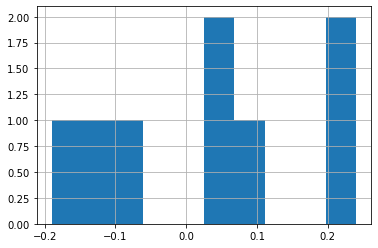

In [16]:
filtered['t+1'].hist()

<AxesSubplot:>

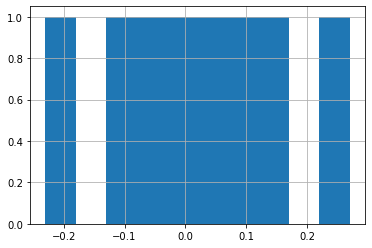

In [17]:
filtered['t+2'].hist()

<AxesSubplot:>

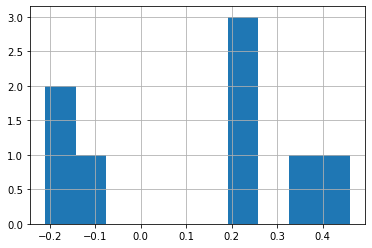

In [18]:
filtered['t+4'].hist()

In [389]:
df['doji'] = talib.C(df['open'], df['high'], df['low'], df['close'])
df['harami'] = talib.CDLHARAMI(df['open'], df['high'], df['low'], df['close'])
df['kick'] = talib.CDLKICKING(df['open'], df['high'], df['low'], df['close'])
df['piecing'] = talib.CDLPIERCING(df['open'], df['high'], df['low'], df['close'])
df['englufing'] = talib.CDLENGULFING(df['open'], df['high'], df['low'], df['close'])
df['hammer'] = talib.CDLHAMMER(df['open'], df['high'], df['low'], df['close'])

AttributeError: module 'talib' has no attribute 'C'

In [17]:
df['morning_star'] = df['morning_star'].astype(bool)

In [18]:
matched_times = df[df['morning_star']]['time']

In [19]:
# Draw the lines for reference
shapes_list = []
annotation_list = []
for time in matched_times:
    shapes_list.append(dict(x0=time, x1=time, y0=0, y1=1, xref='x', yref='paper', line_width=1))
    annotation_list.append(dict(x=time, y=0.05, xref='x', yref='paper', showarrow=False, xanchor='left', text='Hammer'))

# Candle Chart
Draw for single day regarless of dates

In [20]:
fig = go.Figure()

fig.add_trace(go.Candlestick(x=df['time'],
        open=df['open'],
        high=df['high'],
        low=df['low'],
        close=df['close'],
        text=df['close']))

fig.update_layout(
    title=f'Analysis on {day}',
    yaxis_title='Price',
    shapes = shapes_list,
    annotations=annotation_list
)

import plotly.io as pio
pio.renderers.default = 'browser'
pio.show(fig)

# Line Chart

In [13]:
line_data = df[['date', 'time' ,'average', 'open']].copy()

In [14]:
# Find the min open price
min_open_price = line_data['open'].min()

In [15]:
# To bring all open price to 0, subtract open price from average
line_data['avg_nor'] = line_data['average'] - line_data['open']

In [16]:
dates = sorted(line_data['date'].unique())

In [17]:
fig = go.Figure()

for date in dates:
    data = line_data[line_data['date'] == date]
    fig.add_trace(go.Scatter(x=data['time'], y=data['avg_nor'], name = date))

import plotly.io as pio
pio.renderers.default = 'browser'
pio.show(fig)